***Tarea 3***

En el siguiente documentos, trabajaremos creando diferentes gráficos vistos en clases generando sus respectivas imagenes guardadas en la carpeta ./Graficos

1. Para comenzar instalaremos la librería necesaria escribiendo "pip install seaborn"

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


2. Importaremos las librerias necesarias para poder leer, manejar y producir los gráficos

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

3. Luego, leeremos el archivo que previamente habiamos ocupado en la Tarea 2 el cual se llama winequality(limpio).csv

In [4]:
df = pd.read_csv('winequality(limpio).csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,density-kg/m^3,quality classification,Red,White
0,7.4,0.70,0.00,1.9,0.076,11.0,0.064516,3.51,0.56,9.4,5,997.80,Mala,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,0.140553,3.20,0.68,9.8,5,996.80,Mala,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,0.110599,3.26,0.65,9.8,5,997.00,Mala,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,0.124424,3.16,0.58,9.8,6,998.00,Media,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,0.064516,3.51,0.56,9.4,5,997.80,Mala,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,0.198157,3.27,0.50,11.2,6,991.14,Media,0,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,0.373272,3.15,0.46,9.6,5,994.90,Mala,0,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,0.241935,2.99,0.46,9.4,6,992.54,Media,0,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,0.239631,3.34,0.38,12.8,7,988.69,Media,0,1


4. Crearemos la distribucion de la conectración de alcohol en un histograma de alcohol vs densidad, para ello utilizaremos la librería matplotlib

C:\Users\56981\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


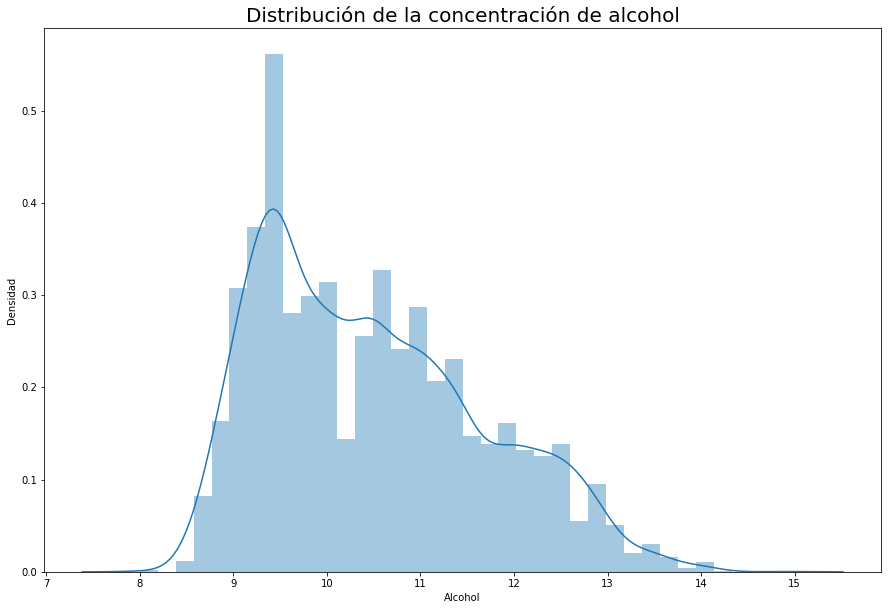

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
ax = sns.distplot(df['alcohol'])
ax.set_title('Distribución de la concentración de alcohol', size=20)
ax.set(ylabel='Densidad', xlabel='Alcohol')
plt.savefig('Graficos/histograma.png', transparent=False)

5. Para el próximo gráfico, necesitaremos saber la cantidad de calidad de Mala, Media y Alta

In [6]:
df['quality classification'].value_counts()

Media    3915
Mala     2384
Alta      198
Name: quality classification, dtype: int64

ahora utilizaremos la información obtenida para crear un gráfico de pie

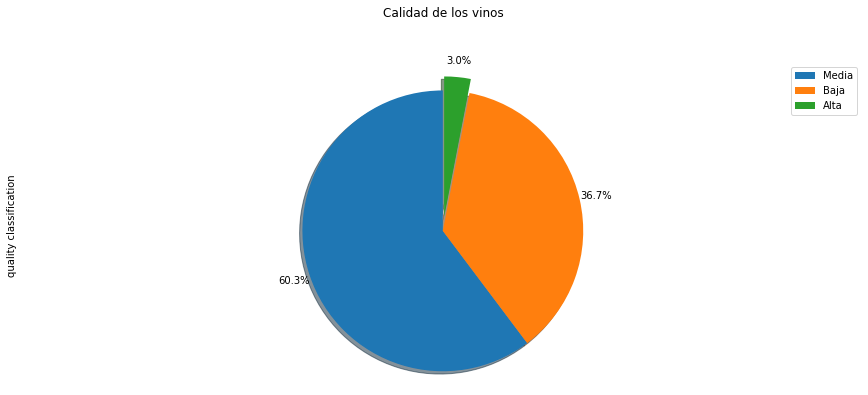

In [88]:

lista_explotar = [0, 0, 0.1] # relación para cada continente del inclinado de cada porción.
df['quality classification'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,           # desactiva las etiquetas en el gráfico
                            pctdistance=1.12,      # relación entre el centro de cada sector circular y el inicio del texto generado por autopct 
                              # añadir colores personalizados
                            explode=lista_explotar # explotar los 3 continentes más bajos
                            )

# aumentar el título en un 12% para que coincida con pctdistance
plt.title('Calidad de los vinos', y=1.12) 

plt.axis('equal')

# añadir leyenda
plt.legend(('Media', 'Baja', 'Alta'))
plt.savefig('Graficos/torta.png', transparent=False)

plt.show()

C:\Users\56981\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\56981\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


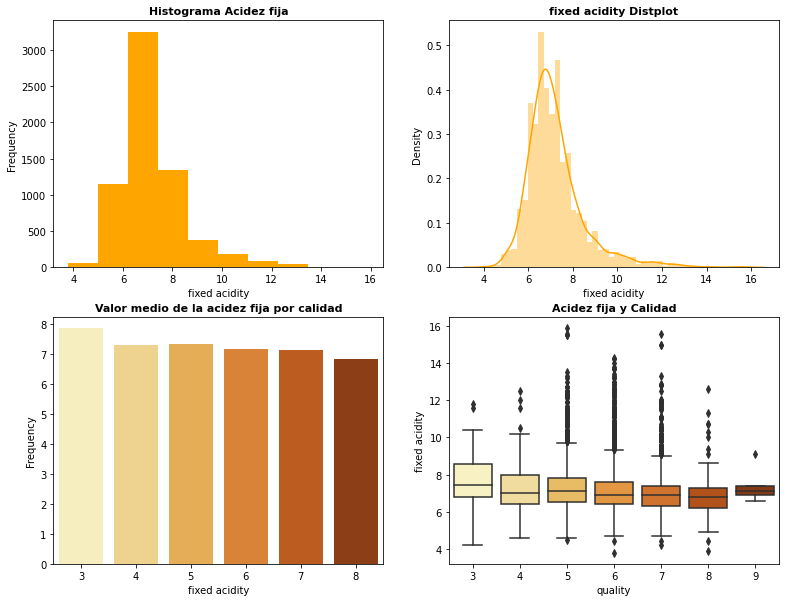

In [87]:
quality = [3,4,5,6,7,8]
fixedAcidityMean = []

for each in quality:
    x = df[df["quality"] == each]
    mean = x["fixed acidity"].mean()
    fixedAcidityMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(df["fixed acidity"], color="orange")
plt.xlabel("fixed acidity")
plt.ylabel("Frequency")
plt.title("Histograma Acidez fija", color = "black", fontweight='bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(df["fixed acidity"],  color="orange")
plt.title("fixed acidity Distplot", color = "black", fontweight='bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = fixedAcidityMean, palette="YlOrBr")
plt.title("Valor medio de la acidez fija por calidad", color = "black", fontweight='bold', fontsize = 11)
plt.xlabel("fixed acidity")
plt.ylabel("Frequency")
plt.subplot(2,2,4)
sns.boxplot(df['quality'], df["fixed acidity"], palette='YlOrBr')
plt.title("Acidez fija y Calidad", color = "black", fontweight= 'bold', fontsize = 11)
plt.savefig('Graficos/graficos_agrupados.png', transparent=False)
plt.show()

In [75]:

calidad = df['quality']
cal_frec = calidad.value_counts()
cal_frec

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [79]:
cal_frec.describe()

count       7.000000
mean      928.142857
std      1142.575078
min         5.000000
25%       111.500000
50%       216.000000
75%      1608.500000
max      2836.000000
Name: quality, dtype: float64

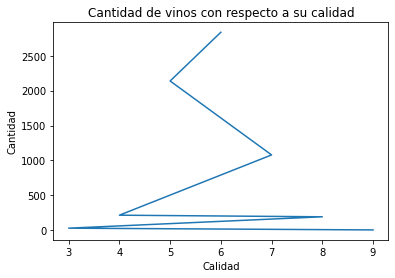

In [86]:
import matplotlib.pyplot as plt

plt.plot(cal_frec)
plt.title('Cantidad de vinos con respecto a su calidad')
plt.xlabel('Calidad')
plt.ylabel('Cantidad')
plt.savefig('Graficos/calidad.png', transparent=False)
plt.show()